In [1]:
import tflite_runtime.interpreter as tflite
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from picamera import PiCamera
from picamera.array import PiRGBArray
import serial
import time
import pandas as pd
import tensorflow as tf
camera = PiCamera(resolution=(640,720))     #comment out if already run

# Device Drivers/Communication

In [14]:
def capture_collect_transfer(i, camera, frame, arduino, cut, enable):
    camera.start_preview()
    camera.capture(frame, 'rgb')
    plt.imshow(frame.array)
    plt.show()
    label = input('Enter Label for capture (empty input skips action): ')
    if len(label) > 0:
        cv.imwrite(f'images-condensed/img{i}.jpg', frame.array)
        with open('images-condensed/headings.txt', 'a+') as fn:
            fn.write(f'{label},')
        print(f'image {i}, with label {label} Saved!')
        heading_id = int(np.digitize(x=int(label), bins=cut))
        #arduino.write(bytearray([enable, heading_id]))
        i += 1
    camera.stop_preview()
    return i

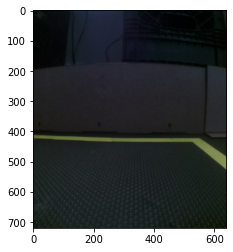

Enter Label for capture (empty input skips action): -45
image 306, with label -45 Saved!


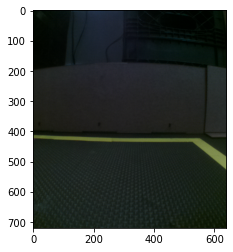

Enter Label for capture (empty input skips action): -45
image 307, with label -45 Saved!


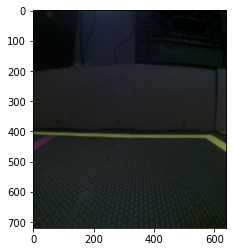

Enter Label for capture (empty input skips action): -45
image 308, with label -45 Saved!


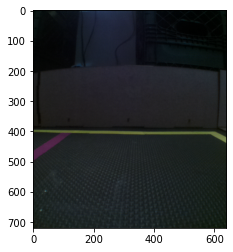

Enter Label for capture (empty input skips action): -45
image 309, with label -45 Saved!


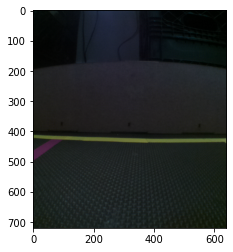

Enter Label for capture (empty input skips action): -45
image 310, with label -45 Saved!


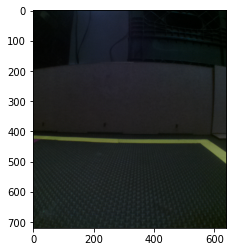

Enter Label for capture (empty input skips action): -45
image 311, with label -45 Saved!


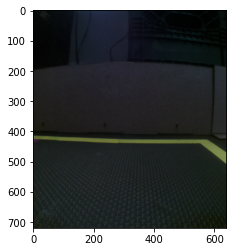

Enter Label for capture (empty input skips action): -45
image 312, with label -45 Saved!


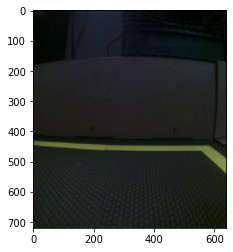

Enter Label for capture (empty input skips action): -45
image 313, with label -45 Saved!


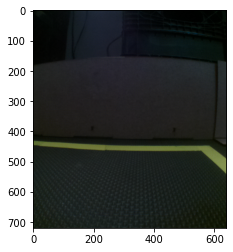

Enter Label for capture (empty input skips action): -45
image 314, with label -45 Saved!


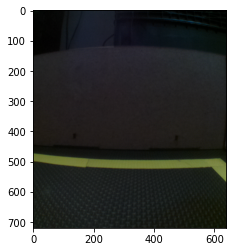

Enter Label for capture (empty input skips action): -90
image 315, with label -90 Saved!


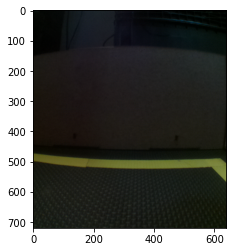

Enter Label for capture (empty input skips action): -90
image 316, with label -90 Saved!


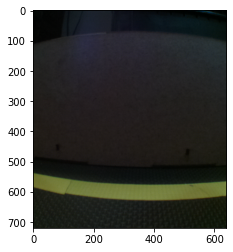

Enter Label for capture (empty input skips action): -90
image 317, with label -90 Saved!


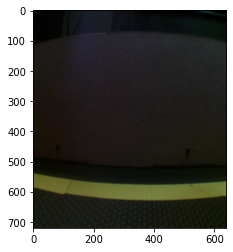

Enter Label for capture (empty input skips action): -90
image 318, with label -90 Saved!


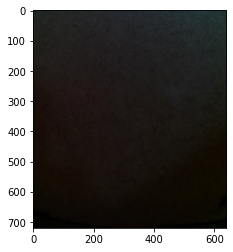

Enter Label for capture (empty input skips action): -90
image 319, with label -90 Saved!


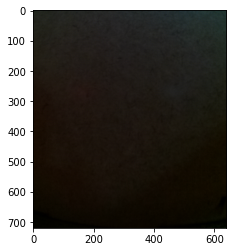

In [ ]:
arduino = serial.Serial('/dev/ttyUSB1', 9600)
enable = 1
disable_msg = bytearray([0,0,0,0])
frame = PiRGBArray(camera, size=(640,720))
cut = [-67, -22, 22, 67]
img = 306

try:
    for i in range(100):
        camera.start_preview()
        img = capture_collect_transfer(img, camera, frame, arduino, cut, enable)
        frame.truncate(0)
        time.sleep(.5)
        arduino.write(disable_msg)
except KeyboardInterrupt:
    arduino.write(disable_msg)
    camera.stop_preview()
    print('Thanks for Driving!')

#### 0,-90,-90,0,45,-90,-90,0,0,0,0

In [10]:
# cut is a span[-90...90] sliced into 5 bins
# heading will be classified as it closest bin
def capture_and_transfer(camera, frame, arduino, cut, enable):
    start = time.time()
    #camera.capture(frame, 'rgb')
    input_data = np.array([frame.array], dtype=np.float32)
    cam_time = time.time() - start
    plt.imshow(frame.array)
    plt.show()
    start = time.time()
    interpreter.set_tensor(0, input_data)
    interpreter.invoke()
    heading = interpreter.get_tensor(37)
    heading_id = int(np.digitize(x=heading, bins=cut))
    model_time = time.time() - start
    print('Heading: ', heading)
    print('Signal: ', heading_id)
    #arduino.write(bytearray([enable, heading_id]))
    return (cam_time, model_time)
        

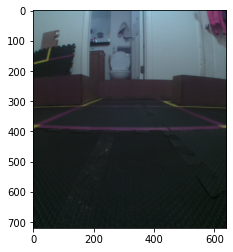

Heading:  [[6.9916205]]
Signal:  2


4

In [3]:
interpreter = tf.lite.Interpreter(model_path="Models/Nav-Model-12.tflite")
interpreter.allocate_tensors()
#camera = PiCamera(resolution=(640,720))
arduino = serial.Serial('/dev/ttyUSB0', 9600)
enable = 1
disable_msg = bytearray([0,0,0,0])
frame = PiRGBArray(camera, size=(640,720))
cut = [-60, -25, 25, 60]        #redifined keep note


try:
    for i in range(1):
        camera.start_preview()
        capture_and_transfer(camera, frame, arduino, cut, enable)
        frame.truncate(0)
        time.sleep(1)
        arduino.write(disable_msg)
except KeyboardInterrupt:
    arduino.write(disable_msg)
    camera.stop_preview()
    print('Thanks for Driving!')
arduino.write(disable_msg)

VVVVV--- For developing the heading -> velocity table ---VVVVV

In [7]:
arduino = serial.Serial('/dev/ttyUSB0', 9600)
enable = 1
disable_msg = bytearray([0,0,0,0])

try:
    for i in range(100):
        mesg = input('Test Command: ')
        msg = bytearray([1, 2])
        arduino.write(msg)
              
except KeyboardInterrupt:
    arduino.write(disable_msg)
    print('Thanks for Driving!')

Test Command: 0
Thanks for Driving!


Full Test Drive

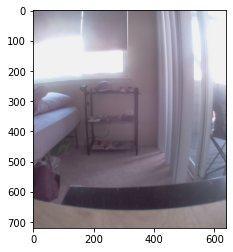

Heading:  [[-10.287838]]
Signal:  2
Total Cycle: 4.229677438735962
Camera time: 0.028989315032958984
Model Time: 1.7528469562530518


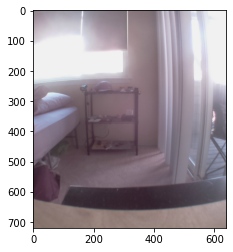

Heading:  [[-18.10417]]
Signal:  2
Total Cycle: 4.183197975158691
Camera time: 0.029561519622802734
Model Time: 1.6412420272827148


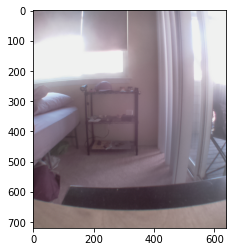

Heading:  [[-16.687569]]
Signal:  2
Total Cycle: 4.13561749458313
Camera time: 0.029323816299438477
Model Time: 1.634181261062622


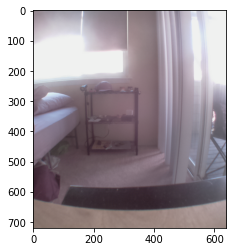

Heading:  [[-17.301182]]
Signal:  2
Total Cycle: 4.110392808914185
Camera time: 0.028914928436279297
Model Time: 1.6428797245025635


In [ ]:
interpreter = tf.lite.Interpreter(model_path="Models/Nav-Model-12.tflite")
interpreter.allocate_tensors()
#arduino = serial.Serial('/dev/ttyUSB0', 9600)
enable = 1
disable_msg = bytearray([0,0,0,0])
frame = PiRGBArray(camera, size=(640,720))
cut = [-67, -22, 22, 67]


try:
    camera.start_preview()
    for frame in camera.capture_continuous(frame, format='rgb'):
        start = time.time()
        times = capture_and_transfer(camera, frame, arduino, cut, enable)
        frame.truncate(0)
        end = time.time()
        duration = end - start
        time.sleep(.75)
        #arduino.write(disable_msg)
        print(f'Total Cycle: {duration}')
        print(f'Camera time: {times[0]}')
        print(f'Model Time: {times[1]}')
        
except KeyboardInterrupt:
    #arduino.write(disable_msg)
    camera.stop_preview()
    print('Thanks for Driving!')

[24,27,28,29,30,31,32,37,38,39,40,41,42,62,63,64,65,66,67,90,91,92,93,97,97,114,115,116,117,118,119,120,131,132,133,134,135,139,140,141,142]

# Deep Learning CV

In [18]:
def load_data(path):    
    images = []

    for i in range(208):
        images.append(cv.cvtColor(cv.imread(path + str(i) + '.jpg'),cv.COLOR_BGR2RGB))
        

    # initialze image data (input)
    images = np.array(images)
    #plt.imshow(images[7])

    # initialize normalized headings (output)
    with open('images/headings.txt', 'r') as f:
        headings = np.array(f.read().strip('\n').split(','))
        
    #le = OneHotEncoder()
    #encoded_headings = le.fit_transform(headings.reshape(len(headings), 1)).toarray()
    print(headings[:5])
    #print(encoded_headings[:5])
    
    return (images, headings.astype(np.float))

In [19]:
images, headings = load_data('images/img')

print(images.shape, headings.shape)

['0' '0' '0' '0' '0']
(208, 720, 640, 3) (160,)


In [17]:
model = load_model('Models/Nav-Model-2-4.h5')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("Nav-Model.tflite", "wb").write(tflite_model)

OSError: Unable to open file (truncated file: eof = 251658240, sblock->base_addr = 0, stored_eof = 467055280)

In [93]:
sample = 14
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Nav-Model-1-1.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
print(input_shape, images.shape)
input_data = np.array([images[sample]], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

print('predicted: ',output_data)
print('actual: ', headings[sample])

[  1 720 640   3] (160, 720, 640, 3)
predicted:  [[-2.4981847]]
actual:  0.0


In [89]:
interpreter = tflite.Interpreter(model_path='test-model.tflite')

In [ ]:
model = tf.keras.models.load_model('lin_reg-2.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
